In [83]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [84]:
X = pd.read_csv('train.csv')

In [85]:
X.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132,24,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88,12,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120,28,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72,30,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52,48,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [86]:
data = X.copy()
target = data.pop('outcome')

data.dtypes

id                         int64
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                      int64
respiratory_rate           int64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [87]:
categorical_columns = [colm for colm in data.columns if data[colm].dtype == 'object']
numerical_columns = [colm for colm in data.columns if data[colm].dtype in ['float64', 'int64']]

In [88]:
print(categorical_columns)
print(numerical_columns)

['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion', 'cp_data']
['id', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3']


In [89]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [90]:
data[categorical_columns]

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
0,1,0,2,4,3,3,2,1,4,3,1,2,2,3,1,0
1,1,0,2,3,5,3,4,1,1,1,2,1,2,3,1,0
2,1,0,2,4,6,2,3,4,1,3,3,0,1,3,1,0
3,1,0,1,4,6,3,4,4,1,3,2,2,2,2,1,1
4,0,0,3,3,4,2,1,4,2,3,1,4,4,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1,0,2,4,6,3,2,1,1,1,2,0,1,3,1,0
1231,1,0,2,4,5,2,4,4,4,3,3,2,2,3,1,1
1232,1,1,3,4,4,2,4,4,4,3,3,3,3,2,1,1
1233,1,0,3,4,2,2,4,4,4,1,2,1,2,2,1,0


In [95]:
#dicreate_features = pd.concat([data[categorical_columns], data[numerical_columns]], axis=1)

dicreate_features = data[categorical_columns]


In [96]:
dicreate_features

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
0,1,0,2,4,3,3,2,1,4,3,1,2,2,3,1,0
1,1,0,2,3,5,3,4,1,1,1,2,1,2,3,1,0
2,1,0,2,4,6,2,3,4,1,3,3,0,1,3,1,0
3,1,0,1,4,6,3,4,4,1,3,2,2,2,2,1,1
4,0,0,3,3,4,2,1,4,2,3,1,4,4,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1,0,2,4,6,3,2,1,1,1,2,0,1,3,1,0
1231,1,0,2,4,5,2,4,4,4,3,3,2,2,3,1,1
1232,1,1,3,4,4,2,4,4,4,3,3,3,3,2,1,1
1233,1,0,3,4,2,2,4,4,4,1,2,1,2,2,1,0


In [97]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(data, target, dicreate_features):
    mi_scores = mutual_info_classif(data, target, discrete_features=dicreate_features)
    mi_scores = pd.Series(mi_scores, name ='MI Scores', index = data.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    
    return mi_scores


mi_scores = make_mi_scores(data, target, dicreate_features)

In [98]:
mi_scores

id                       1.046015
hospital_number          0.426632
pulse                    0.194371
lesion_1                 0.185150
total_protein            0.169253
abdomo_protein           0.142713
nasogastric_reflux_ph    0.137497
pain                     0.133895
packed_cell_volume       0.125418
respiratory_rate         0.093244
mucous_membrane          0.079693
capillary_refill_time    0.079137
temp_of_extremities      0.077787
abdominal_distention     0.070806
abdomo_appearance        0.058928
rectal_temp              0.058194
peripheral_pulse         0.055356
cp_data                  0.050092
surgical_lesion          0.049485
peristalsis              0.043837
rectal_exam_feces        0.038769
nasogastric_tube         0.028162
nasogastric_reflux       0.027726
age                      0.021647
abdomen                  0.021380
surgery                  0.013449
lesion_3                 0.010600
lesion_2                 0.000880
Name: MI Scores, dtype: float64

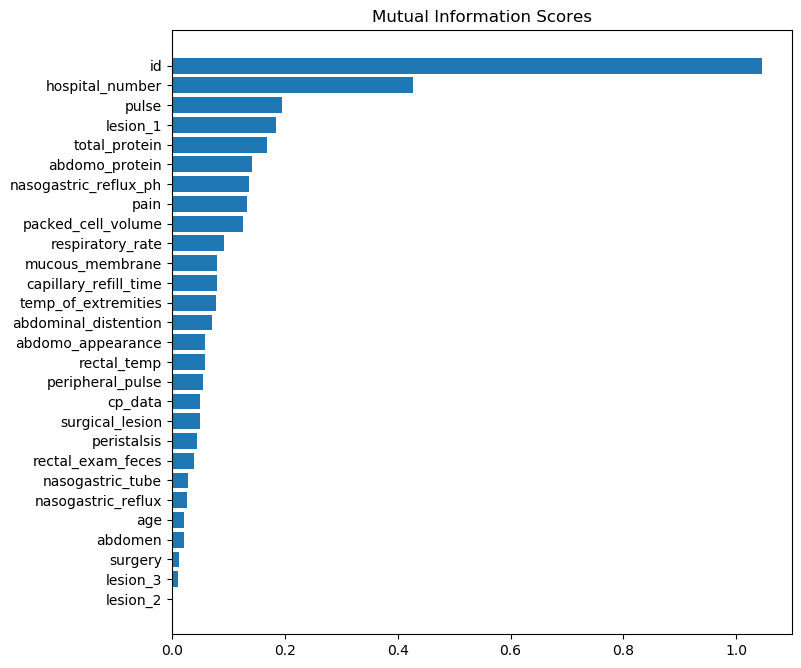

In [99]:


import matplotlib.pyplot as plt
import numpy as np

def plot_mi_score(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
    
plt.figure(dpi=100, figsize=(8,8))
plot_mi_score(mi_scores)    

In [107]:
x = pd.concat([data[categorical_columns], data[numerical_columns]], axis=1)

columns_to_remove = ['lesion_2', 'lesion_3', 'surgery', 'abdomen', 'age', 'nasogastric_reflux', 'nasogastric_tube', 'rectal_exam_feces']
x = x.drop(columns_to_remove, axis=1)

x.head()


,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,abdomo_appearance,surgical_lesion,cp_data,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1
0,2,4,3,3,2,1,4,3,1,0,0,530001,38.1,132,24,6.5,57.0,8.5,3.4,2209
1,2,3,5,3,4,1,1,3,1,0,1,533836,37.5,88,12,2.0,33.0,64.0,2.0,2208
2,2,4,6,2,3,4,1,3,1,0,2,529812,38.3,120,28,3.5,37.0,6.4,3.4,5124
3,1,4,6,3,4,4,1,2,1,1,3,5262541,37.1,72,30,2.0,53.0,7.0,3.9,2208
4,3,3,4,2,1,4,2,2,0,1,4,5299629,38.0,52,48,7.0,47.0,7.3,2.6,0


In [115]:
#model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [108]:
X_train,X_test, Y_train,Y_test = train_test_split(x, target, test_size=.2, random_state=0)

In [112]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier(random_state=42)
model3 = RandomForestClassifier(n_estimators=71, random_state=42)
model4 = GaussianNB()


In [113]:
model1.fit(X_train,Y_train)
model2.fit(X_train, Y_train)
model3.fit(X_train, Y_train)
model4.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [114]:
print(model1.score(X_test, Y_test))
print(model2.score(X_test, Y_test))
print(model3.score(X_test, Y_test))
print(model4.score(X_test, Y_test))

0.44129554655870445
0.562753036437247
0.6720647773279352
0.5587044534412956


In [129]:
output = label_encoder.fit_transform(target)
output

array([0, 1, 2, ..., 2, 2, 2])

In [147]:
num_folds = 5

# Use cross_val_score to obtain cross-validation scores
scores = cross_val_score(model4, x, output ,cv=num_folds, scoring='neg_mean_squared_error')
print(scores)

[-1.14574899 -0.81781377 -1.19838057 -1.30769231 -0.98785425]


In [148]:
scores.mean()

-1.091497975708502

In [149]:
np.median(scores)

-1.145748987854251

In [150]:


# Calculate the absolute values of the scores
mse_scores = np.abs(scores)

# Print the actual MSE scores
print(mse_scores)

[1.14574899 0.81781377 1.19838057 1.30769231 0.98785425]
